                                 PYTHON DATA ANALYSIS ASSIGNMENT

 Analysis of this data is to look at the demography and a change in various structures of the common plant species  under grazed and ungrazed conditions with climate factors from the year 1997 to 2010. 

            Import packages

In [90]:
import pandas as pd

In [91]:
import sqlite3

In [92]:
%matplotlib inline

            Load Data from bash and read in pandas.

In [93]:
!retriever install sqlite mapped-plant-quads-co

=> Installing Shortgrass steppe mapped plants quads - Chu et al. 2013
Creating table mapped_plant_quads_co_allrecords_cover...
Progress: 400 / 105155 rows inserted into mapped_plant_quads_co_allrecords_cover totaling 105155:Progress: 800 / 105155 rows inserted into mapped_plant_quads_co_allrecords_cover totaling 105155:Progress: 1200 / 105155 rows inserted into mapped_plant_quads_co_allrecords_cover totaling 105155:Progress: 1600 / 105155 rows inserted into mapped_plant_quads_co_allrecords_cover totaling 105155:Progress: 2000 / 105155 rows inserted into mapped_plant_quads_co_allrecords_cover totaling 10

In [94]:
connection = sqlite3.connect("sqlite.db")

In [95]:
table_names = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type = 'table'",
                               connection)
table_names

,name
0,mapped_plant_quads_co_allrecords_cover
1,mapped_plant_quads_co_allrecords_density
2,mapped_plant_quads_co_daily_climate
3,mapped_plant_quads_co_quad_info
4,mapped_plant_quads_co_quad_inventory
5,mapped_plant_quads_co_quad_stocking_rate
6,mapped_plant_quads_co_species_list
7,mapped_plant_quads_co_species_name_changes


In [96]:
cover = pd.read_sql_query("SELECT * FROM mapped_plant_quads_co_allrecords_cover",
                           connection)
cover.head()

,quad,year,species,area,x,y
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494


In [111]:
stock = pd.read_sql_query("SELECT * FROM mapped_plant_quads_co_quad_stocking_rate",
                           connection)
stock.head()

,year,pasture,num_hd,date_in,date_out,asg,notes
0,1997.0,5b,26,8-May,23-Oct,296.5,yearling breeders
1,1997.0,5a,20,14-May,8-Oct,404.8,steers
2,1997.0,7,22,1-May,23-Oct,274.0,two year old breeders
3,1997.0,11,13,14-May,9-Oct,343.6,steers
4,1997.0,19,70,12-May,8-Oct,347.5,steers rotated in 7-160 acre pastures


In [68]:
spp = pd.read_sql_query("SELECT * FROM mapped_plant_quads_co_species_list",
                           connection)
spp.head()

,species,density,cover,growthform,longevity
0,Achillea millefolium,2.0,NaN,forb,P
1,Agropyron smithii,4649.0,NaN,grass,P
2,Allium spp.,18.0,NaN,forb,P
3,Allium textile,73.0,NaN,forb,P
4,Ambrosia psilostachya,2.0,NaN,forb,P


In [97]:
quad = pd.read_sql_query("SELECT * FROM mapped_plant_quads_co_quad_info",
                           connection)
quad.head()

,quadrat,pasture,latitude,longitude,elevation,before1997,from1997
0,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed
1,gzgz_19,19,40.823798,-104.710306,1633,grazed,grazed
2,gzgz_24,24,40.822824,-104.729504,1650,grazed,grazed
3,gzgz_5a,5a,40.868138,-104.690792,1657,grazed,grazed
4,gzgz_5b,5b,40.867662,-104.680630,1661,grazed,grazed


In [98]:
climate = pd.read_sql_query("SELECT * FROM mapped_plant_quads_co_daily_climate",
                           connection)
climate.head()

,year,month,day,meant,flag_meant,maxt,flag_maxt,mint,flag_mint,precip,flag_precip
0,1997,1,1,8.33,g,16.11,g,0.56,g,0.000,g
1,1997,1,2,8.89,g,14.44,g,3.33,g,0.000,g
2,1997,1,3,10.56,g,21.67,g,-0.56,g,0.254,g
3,1997,1,4,3.61,g,8.89,g,-1.67,g,0.000,g
4,1997,1,5,-4.44,g,3.89,g,-12.78,g,0.000,g


        1. A plot of the area covered by each species over all quadrats (y) for each year (x).

In [99]:
merged = pd.merge(left = cover, right = spp, how = 'left',
        left_on = 'species', right_on = 'species')
merged.head()

,quad,year,species,area,x,y,density,cover,growthform,longevity
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800,NaN,1299.0,Not plant,Not plant
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482,10.0,1988.0,Not plant,Not plant
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623,NaN,47497.0,grass,P
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770,NaN,47497.0,grass,P
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494,10.0,1988.0,Not plant,Not plant


In [100]:
sp_plot = merged.groupby(['species','year'], 
                         as_index = False).area.sum()


sp_plot.head()

,species,year,area
0,Ant hill,1998,0.011008
1,Ant hill,1999,0.014806
2,Ant hill,2000,0.006458
3,Ant hill,2001,0.013366
4,Ant hill,2002,0.003034


In [101]:
sp_plot_wide = sp_plot.pivot(index = 'year', columns = 'species', 
                             values = 'area')

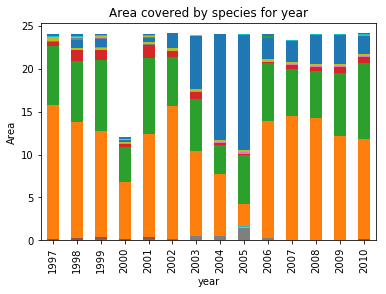

In [102]:
my_plot = sp_plot_wide.plot(kind = 'bar', stacked = True, legend = False, 
                  title = "Area covered by species for year")
my_plot.set_xlabel("year")
my_plot.set_ylabel("Area")

    Brief discussion of results

This graph shows the area covered by each species of plant for all quadrats both grazed and ungrazed
from 1997 to 2010.  From the graph, generally, species group with the mauve legend (Mushroom, corner plate and bare ground) occupied a wider surface area compared to the species forms. Those with blue legend covered less areas.across the years excluding year 2004 and 2005,
 The rest of the species however are seen to occupy a small surface
area across all years which may be due to the effect of climate or grazed by animals henc changes in the demography of the species (area covered)
are observed.

    2. A plot of the area covered by each growth-form over all quadrats (y) for each year (x)

In [103]:
GF_plot = merged.groupby(['growthform','year'], 
                         as_index = False).area.sum()
GF_plot.head()

,growthform,year,area
0,Crown,1998,0.883835
1,Crown,1999,1.001064
2,Crown,2000,0.287084
3,Crown,2001,0.503875
4,Crown,2002,1.647143


In [104]:
GF_plot_wide = GF_plot.pivot(index = 'year', columns = 'growthform', 
                             values = 'area')

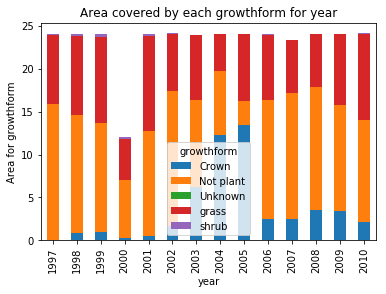

In [105]:
my_plota = GF_plot_wide.plot(kind = 'bar', stacked = True, legend = True, 
                  title = "Area covered by each growthform for year")
my_plota.set_xlabel("year")
my_plota.set_ylabel("Area for growthform")

        Brief discussion of results

This plot shows the growth form of all species of plant from 1997 t0 2010. It can be inferred from the plot that species  that are not plant  covered greater part of area across years.Grass covered larger areas than shrubs.seen that generally across the years, the growthform of most species were not plant, followed by grass, 
crown species and the least observed as shrub and unknown forms. the changes observed in the growthform of these common species 
may also be due to climatic conditions impacting the various growthforms or over grazed of most species in each year leading to 
the loss of most plant species.


1. A plot of the area covered by each growth-form over all quadrats (y) as a function of the mean precipitation for the year (x)

In [106]:
merged4 = pd.merge(left = cover, right = spp, how = 'left',
                 left_on = 'species', right_on = 'species')
merged4.head()

,quad,year,species,area,x,y,density,cover,growthform,longevity
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800,NaN,1299.0,Not plant,Not plant
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482,10.0,1988.0,Not plant,Not plant
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623,NaN,47497.0,grass,P
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770,NaN,47497.0,grass,P
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494,10.0,1988.0,Not plant,Not plant


In [107]:
merged5 = pd.merge(left = merged4, right = climate, how = 'left',
                 left_on = 'year', right_on = 'year')
merged5.head()

,quad,year,species,area,x,y,density,cover,growthform,longevity,month,day,meant,flag_meant,maxt,flag_maxt,mint,flag_mint,precip,flag_precip
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.9778,NaN,1299.0,Not plant,Not plant,1,1,8.33,g,16.11,g,0.56,g,0.000,g
1,gzgz_11,1997,Corner plate,0.001863,0.021345,0.9778,NaN,1299.0,Not plant,Not plant,1,2,8.89,g,14.44,g,3.33,g,0.000,g
2,gzgz_11,1997,Corner plate,0.001863,0.021345,0.9778,NaN,1299.0,Not plant,Not plant,1,3,10.56,g,21.67,g,-0.56,g,0.254,g
3,gzgz_11,1997,Corner plate,0.001863,0.021345,0.9778,NaN,1299.0,Not plant,Not plant,1,4,3.61,g,8.89,g,-1.67,g,0.000,g
4,gzgz_11,1997,Corner plate,0.001863,0.021345,0.9778,NaN,1299.0,Not plant,Not plant,1,5,-4.44,g,3.89,g,-12.78,g,0.000,g


In [108]:
GF_plot3 = merged5.groupby(['year', 'growthform'],
                           as_index = False).precip.mean()

GF_plot3.head()

,year,growthform,precip
0,1997,Not plant,1.543701
1,1997,Unknown,1.543701
2,1997,grass,1.543701
3,1997,shrub,1.543701
4,1998,Crown,0.964534


In [85]:
GF_plot_widea = GF_plot3.pivot(index = 'year', columns = 'growthform',
                             values = 'precip')

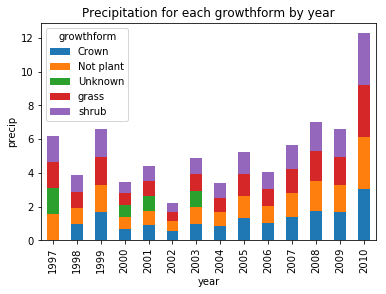

In [86]:
My_plot = GF_plot_widea.plot(kind = 'bar', stacked = True, legend = True,
                            title = "Precipitation for each growthform by year")
My_plot.set_xlabel("year")
My_plot.set_ylabel("precip")

This plot shows the effect of climate(precipitation) on the growthform of plant species from 1997 to 2010. The plot generally shows fluctuation in precipitation across years. Individual growth forms receved equal amounts of 
precipitation within each year. The growth forms recieved greater amount of precipitation in 2010, however precipitation for growth forms in 2002 was the least. 

In [112]:
merged7 = pd.merge(left = stock, right = quad, how = 'left',
                 left_on = 'pasture', right_on = 'pasture')
merged7.head()

,year,pasture,num_hd,date_in,date_out,asg,notes,quadrat,latitude,longitude,elevation,before1997,from1997
0,1997.0,5b,26,8-May,23-Oct,296.5,yearling breeders,gzgz_5b,40.867662,-104.680630,1661.0,grazed,grazed
1,1997.0,5b,26,8-May,23-Oct,296.5,yearling breeders,gzun_5b,40.867588,-104.680277,1662.0,grazed,ungrazed
2,1997.0,5b,26,8-May,23-Oct,296.5,yearling breeders,ungz_5b,40.866952,-104.680311,1660.0,ungrazed,grazed
3,1997.0,5b,26,8-May,23-Oct,296.5,yearling breeders,unun_5b,40.867330,-104.680301,1659.0,ungrazed,ungrazed
4,1997.0,5a,20,14-May,8-Oct,404.8,steers,gzgz_5a,40.868138,-104.690792,1657.0,grazed,grazed


In [113]:
merged8 = pd.merge(left = merged7, right = cover, how = 'left',
                 left_on = 'year', right_on = 'year')
merged8.head()

,year,pasture,num_hd,date_in,date_out,asg,notes,quadrat,latitude,longitude,elevation,before1997,from1997,quad,species,area,x,y
0,1997.0,5b,26,8-May,23-Oct,296.5,yearling breeders,gzgz_5b,40.867662,-104.68063,1661.0,grazed,grazed,gzgz_11,Corner plate,0.001863,0.021345,0.977800
1,1997.0,5b,26,8-May,23-Oct,296.5,yearling breeders,gzgz_5b,40.867662,-104.68063,1661.0,grazed,grazed,gzgz_11,Bare ground,0.013359,0.086730,0.946482
2,1997.0,5b,26,8-May,23-Oct,296.5,yearling breeders,gzgz_5b,40.867662,-104.68063,1661.0,grazed,grazed,gzgz_11,Bouteloua gracilis,0.000169,0.167067,0.996623
3,1997.0,5b,26,8-May,23-Oct,296.5,yearling breeders,gzgz_5b,40.867662,-104.68063,1661.0,grazed,grazed,gzgz_11,Bouteloua gracilis,0.014171,0.343203,0.963770
4,1997.0,5b,26,8-May,23-Oct,296.5,yearling breeders,gzgz_5b,40.867662,-104.68063,1661.0,grazed,grazed,gzgz_11,Bare ground,0.001982,0.377101,0.987494


In [114]:
GF_plot3 = merged8.groupby(['from1997', 'species'],
                           as_index = False).area.mean()

GF_plot3.head()

,from1997,species,area
0,grazed,Ant hill,0.001904
1,grazed,Aristida fendleriana,0.000025
2,grazed,Aristida longiseta,0.001437
3,grazed,Aristida spp.,0.000353
4,grazed,Artemisia dracunculus,0.000767


In [115]:
GF_plot3_widea = GF_plot3.pivot(index = 'species', columns = 'from1997',
                             values = 'area')

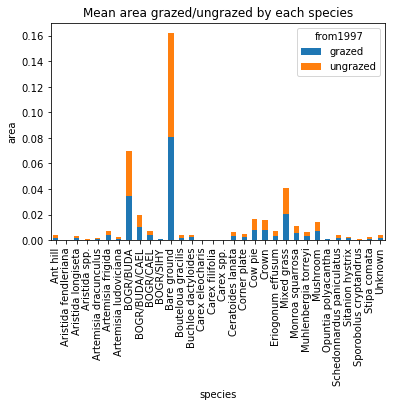

In [116]:
My_plot3 = GF_plot3_widea.plot(kind = 'bar', stacked = True, legend = True,
                            title = "Mean area grazed/ungrazed by each species")
My_plot3.set_xlabel("species")
My_plot3.set_ylabel("area")

This plot indicates the average area grazed or ungrazed by each of the species. Generally each species have 
grazed half its area and have left the other half ungrazed. However, the species such as Buda, Bare ground 
and mixed grass show a large area grazed and ungrazed from 1997 to 2010 when compared to other species.